In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import statsmodels.api as sm
from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')


## Analisando series temporais

In [157]:
df = pd.read_csv('AAPL Dados Históricos.csv')
df['Date'] = pd.to_datetime(df['Data']).dt.date
df=  df.sort_values(by=['Date'])
df = df.set_index('Date')
df.head()


,Data,Último,Abertura,Máxima,Mínima,Vol/,Var%
Date,,,,,,,
2010-01-06,01/06/2010,37.26,37.10,37.99,36.99,219.12M,1.53%
2010-01-07,01/07/2010,35.50,36.33,36.40,34.75,255.74M,-1.20%
2010-01-09,01/09/2010,35.76,35.35,35.92,35.18,174.26M,2.97%
2010-01-10,01/10/2010,40.36,40.88,40.94,40.19,112.10M,-0.44%
2010-01-11,01/11/2010,43.45,43.17,43.66,43.17,105.97M,1.05%


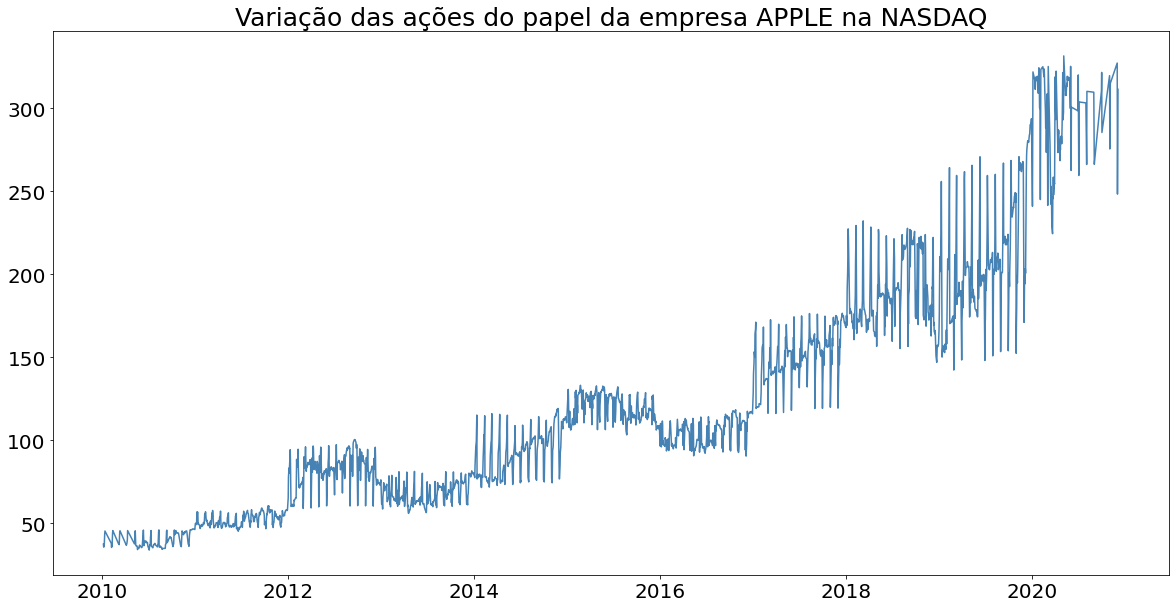

In [169]:
plt.figure(figsize=[20,10])
plt.plot(df.index,df.Último, color='steelblue')
plt.title('Variação das ações do papel da empresa APPLE na NASDAQ', size = 25)
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig('output.png')
plt.show()

## Fazendo a decomposição das séries

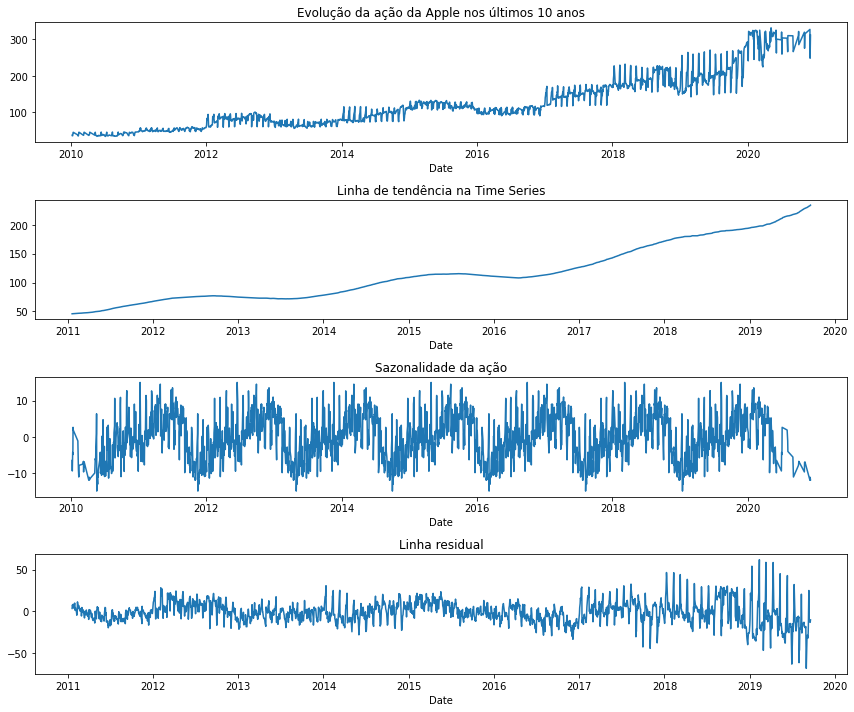

In [163]:
res = sm.tsa.seasonal_decompose(df.Último,
                                freq=360,
                                model='additive')



fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(12,10))
#plt.title('Ações da empresa Apple no Ibov nos últimos 10 anos', size = 25)

ax1.title.set_text('Evolução da ação da Apple nos últimos 10 anos')
ax2.title.set_text('Linha de tendência na Time Series')
ax3.title.set_text('Sazonalidade da ação')
ax4.title.set_text('Linha residual')



res.observed.plot(ax=ax1)
res.trend.plot(ax=ax2)
res.seasonal.plot(ax=ax3)
res.resid.plot(ax=ax4)

plt.tight_layout()
plt.savefig('output_saz')
plt.show()

## Utilizando a biblioteca Prophet para realizar o Forecast

In [166]:
df['ds'] = df['Data']
df['y'] = df['Último']
d2 = df[['ds','y']]
m = Prophet()
m.fit(d2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


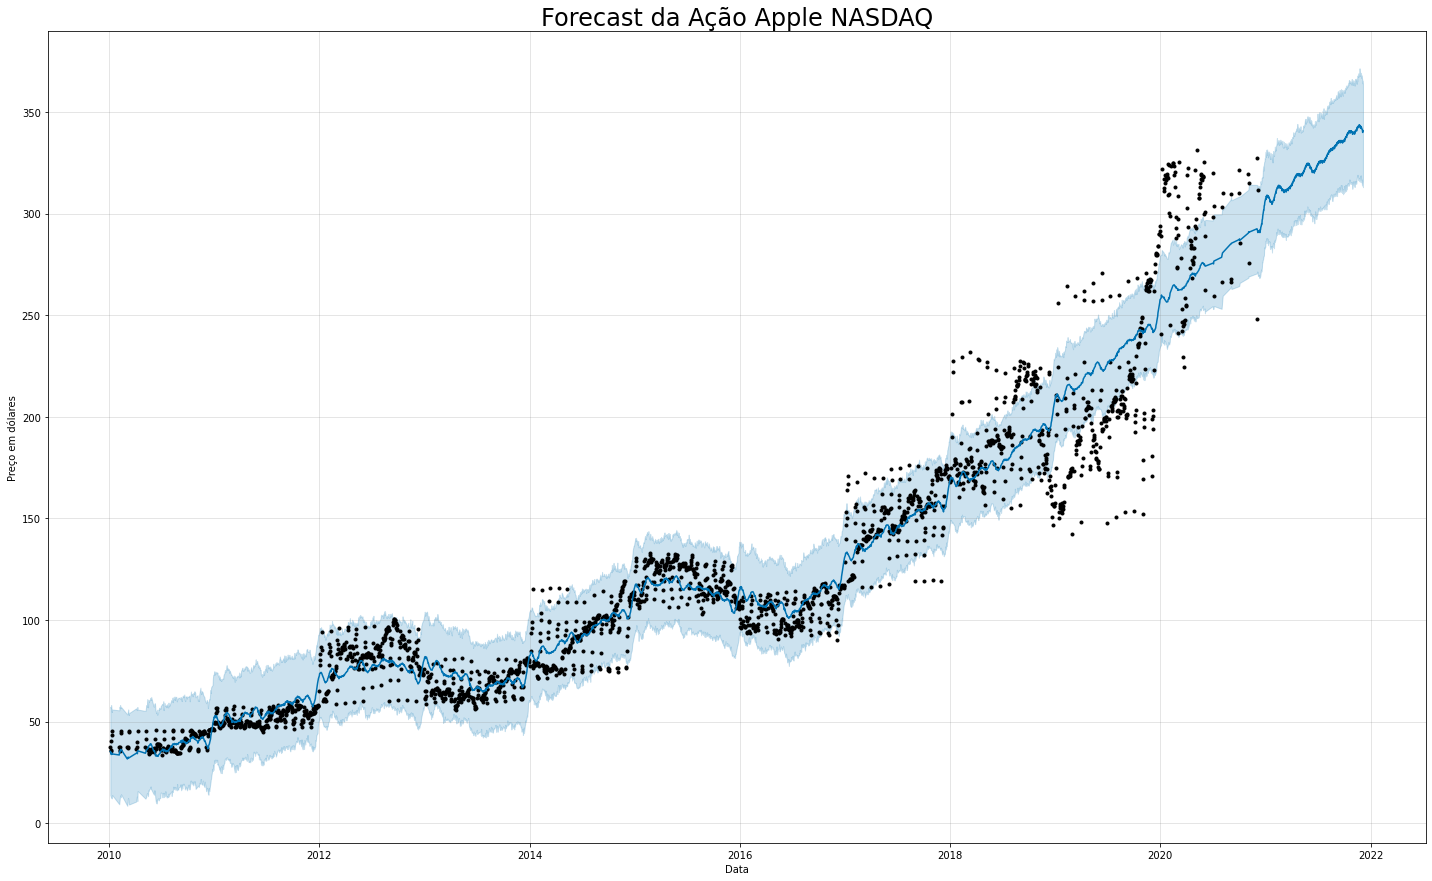

In [168]:
dict = {'fontsize':24,
 'fontweight' : 20,
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'}


future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast,xlabel="Data", ylabel="Preço em dólares", figsize=(20,12))
plt.title('Forecast da Ação Apple NASDAQ',y=0.95,fontdict=dict)
fig1.savefig('out_forecast.png')
fig.show()


In [170]:
m.fit(df=)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2900,2021-12-01,346.300922,314.768273,367.972710,334.214278,357.361554,-4.450158,-4.450158,-4.450158,0.226593,0.226593,0.226593,-4.676752,-4.676752,-4.676752,0.0,0.0,0.0,341.850764
2901,2021-12-02,346.434942,313.785233,366.164060,334.282942,357.535930,-5.098278,-5.098278,-5.098278,0.024031,0.024031,0.024031,-5.122309,-5.122309,-5.122309,0.0,0.0,0.0,341.336664
2902,2021-12-03,346.568963,314.990712,365.932893,334.352681,357.710307,-5.409544,-5.409544,-5.409544,0.152107,0.152107,0.152107,-5.561651,-5.561651,-5.561651,0.0,0.0,0.0,341.159419
2903,2021-12-04,346.702983,315.632100,363.959007,334.423229,357.884683,-6.803669,-6.803669,-6.803669,-0.820209,-0.820209,-0.820209,-5.983459,-5.983459,-5.983459,0.0,0.0,0.0,339.899314
2904,2021-12-05,346.837003,312.962910,365.282410,334.493778,358.059059,-6.023086,-6.023086,-6.023086,0.353169,0.353169,0.353169,-6.376255,-6.376255,-6.376255,0.0,0.0,0.0,340.813917
